#*** METODOS COMPUTACIONALES TALLER 2***

# PUNTO 1

1.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


plt.rcParams["figure.figsize"] = [16,5]



# Cargar los datos desde la URL
url = "https://www.ngdc.noaa.gov/stp/space-weather/solar-data/solar-indices/sunspot-numbers/american/lists/list_aavso-arssn_daily.txt"
data = pd.read_csv(url, delim_whitespace=True, header=None, names=["Year", "Month", "Day", "Sunspot_Number"]).dropna()

# Eliminar filas donde 'Year', 'Month', o 'Day' tengan valores nulos o no numéricos
data = data.dropna(subset=["Year", "Month", "Day"])  # Eliminar filas con NaN en las columnas de fecha
data = data[data["Year"].apply(lambda x: str(x).isdigit())]  # Filtrar filas con valores válidos
data = data[data["Month"].apply(lambda x: str(x).isdigit())]
data = data[data["Day"].apply(lambda x: str(x).isdigit())]

data["Sunspot_Number"] = data["Sunspot_Number"].astype(float)

# Convertir las columnas 'Year', 'Month', 'Day' a enteros
data["Year"] = data["Year"].astype(int)
data["Month"] = data["Month"].astype(int)
data["Day"] = data["Day"].astype(int)

# Crear una columna de fecha combinando Year, Month y Day correctamente
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Filtrar los datos hasta el 1 de enero de 2012
data = data[data['Date'] <= '2012-01-01']

# Manejar valores nulos en la columna de manchas solares
data = data.dropna(subset=["Sunspot_Number"])

promedio = data["Sunspot_Number"].mean()

data["Sunspot_Number"]-=promedio

# Aplicar la transformada rápida de Fourier (FFT)
trasn_f_discreta = np.fft.fft(data["Sunspot_Number"])

# Obtener las frecuencias correspondientes
freq = np.fft.fftfreq(len(data['Sunspot_Number']))

# Filtrar frecuencias menores a 10^-3
mask = np.abs(freq)  > 1e-3
filtered_freq = freq

filtered_magnitude = trasn_f_discreta.copy()

filtered_magnitude[mask]= 0

frecuencia_transfomada_max = abs(freq[abs(filtered_magnitude).argmax()])

print(abs(filtered_magnitude).argmax())

P = 1/frecuencia_transfomada_max
p_años = P/365.25
print("Ciclo de actividad solar (años)= " +str(p_años))
print(frecuencia_transfomada_max)





24466
Ciclo de actividad solar (años)= 11.166780743782796
0.0002451781627983001


1.2 (a)

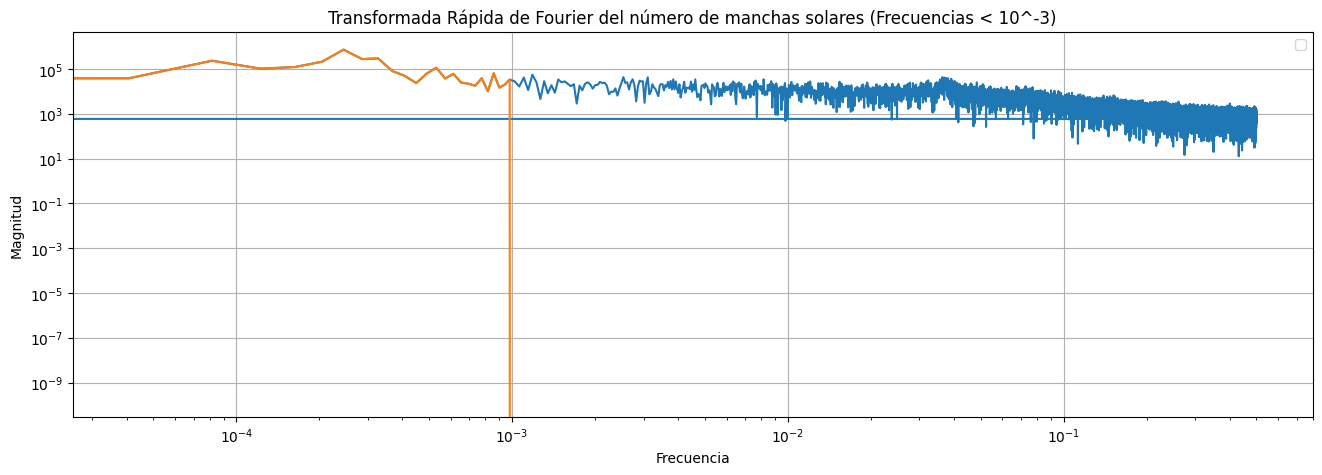

In [ ]:

plt.plot(freq,abs(trasn_f_discreta))
plt.plot(freq,abs(filtered_magnitude))
plt.title('Transformada Rápida de Fourier del número de manchas solares (Frecuencias < 10^-3)')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

plt.show()




1.2 (b)

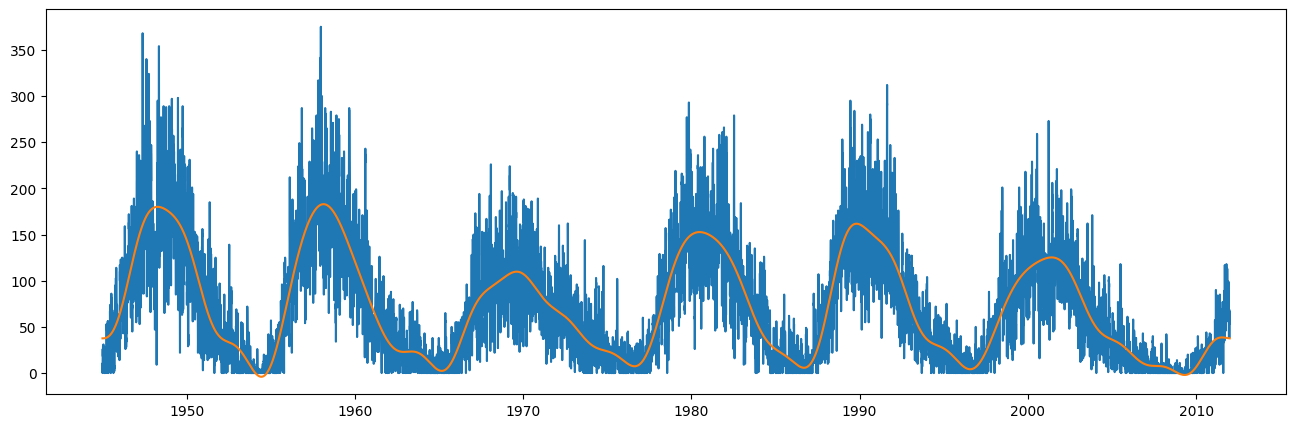

In [ ]:
plt.plot(data["Date"],data["Sunspot_Number"]+promedio)
transformada_inversa = np.fft.ifft(filtered_magnitude)+promedio

plt.plot(data["Date"],transformada_inversa.real)


In [ ]:
data['Date'].iloc[0]

Timestamp('1945-01-01 00:00:00')

1.3

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


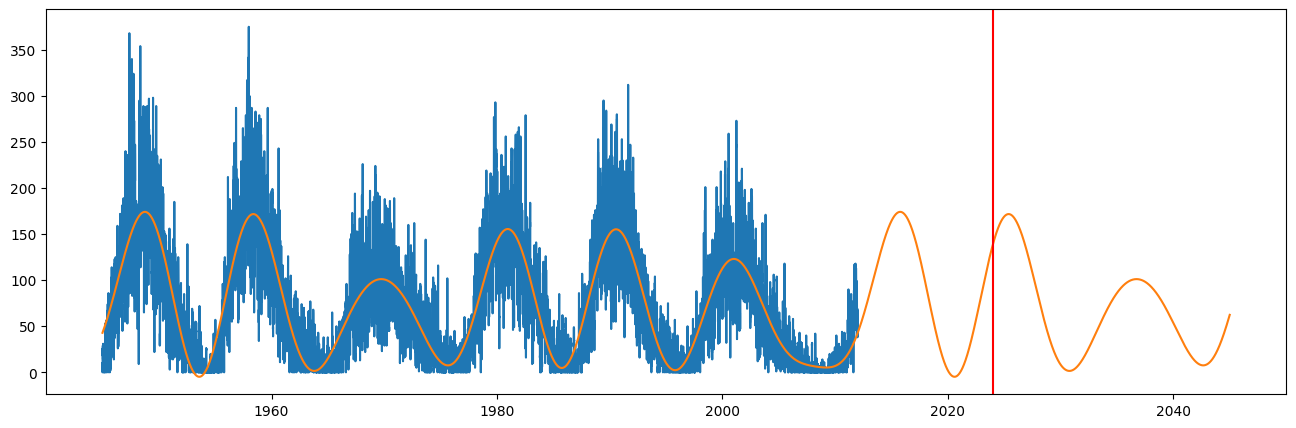

In [ ]:
o_date = pd.date_range(data['Date'].iloc[0],pd.to_datetime('2045-01-01'),freq='D')
o = np.arange(len(o_date))

primeras_f = freq[:10]
ultimas_f = freq[-10:]




primeras_F = trasn_f_discreta[:10]
ultimas_F = trasn_f_discreta[-10:]

Fourier = np.concatenate([primeras_F,ultimas_F])


frecuencias = np.concatenate([primeras_f,ultimas_f])


def transformada_i_m(f,F,t):
  return (np.sum(F[:,None]*np.exp(1j*2*np.pi*f[:,None]*t[None,:]),axis=0))/len(data)

plt.plot(data["Date"],data["Sunspot_Number"]+promedio)
plt.plot(o_date,transformada_i_m(frecuencias,Fourier,o)+promedio)

plt.axvline(x=pd.to_datetime('2024-01-01'),color='red')




**`-Estamos a punto de llegar al pico del ciclo solar, en la fase de máximo solar del Ciclo Solar 25`**
**`-A mitad de agosto de 2024, deberíamos esperar 162  de manchas solares.`**


## ***PUNTO 2.1 y 2.2 ***

[[233. 242. 248. ... 214. 219. 224.]
 [245. 252. 255. ... 224. 230. 235.]
 [253. 255. 255. ... 235. 240. 245.]
 ...
 [115. 129. 141. ... 109. 115. 129.]
 [138. 146. 153. ... 128. 130. 133.]
 [154. 156. 157. ... 149. 148. 141.]]


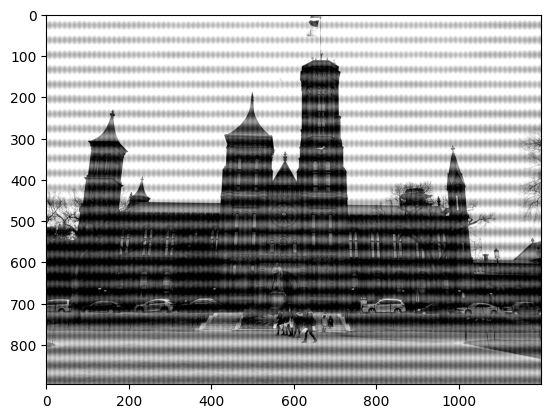

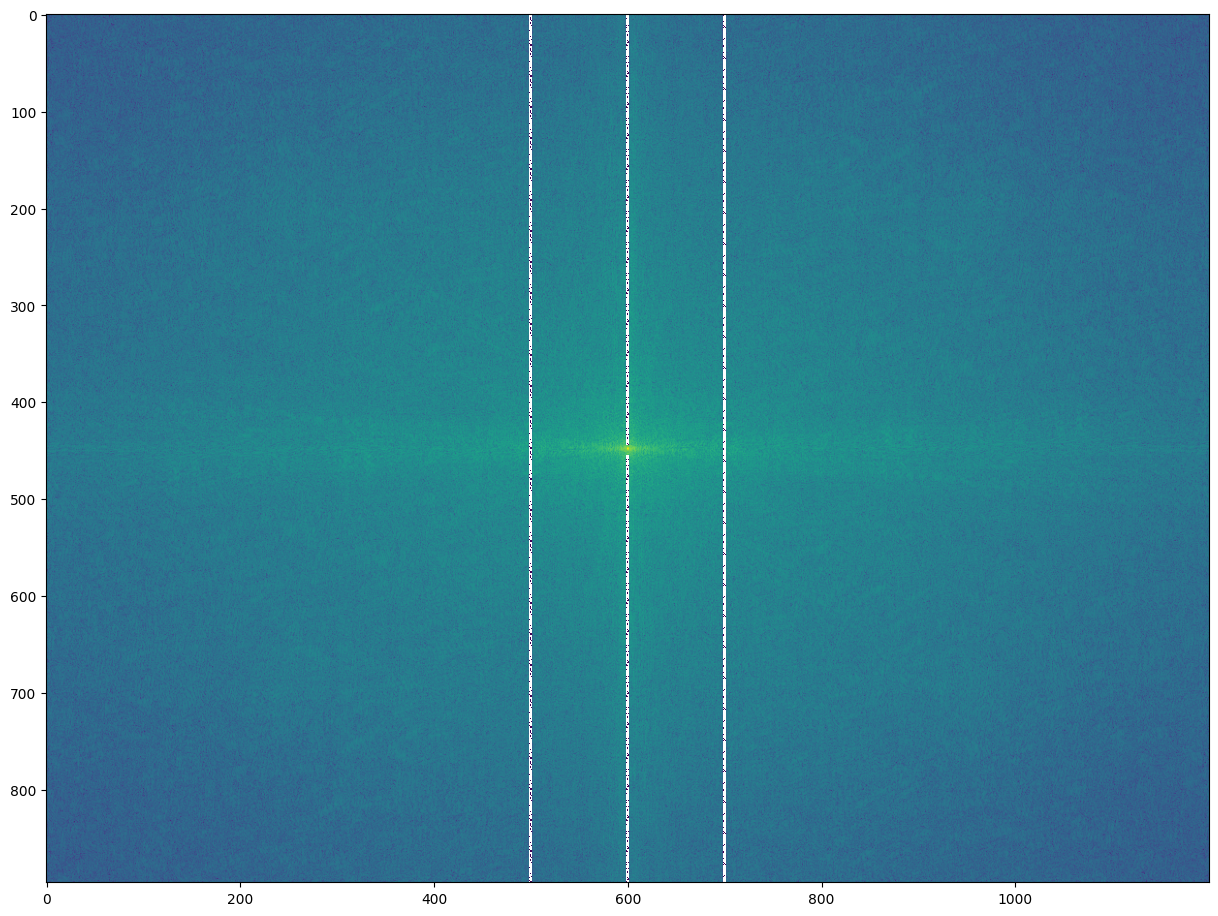

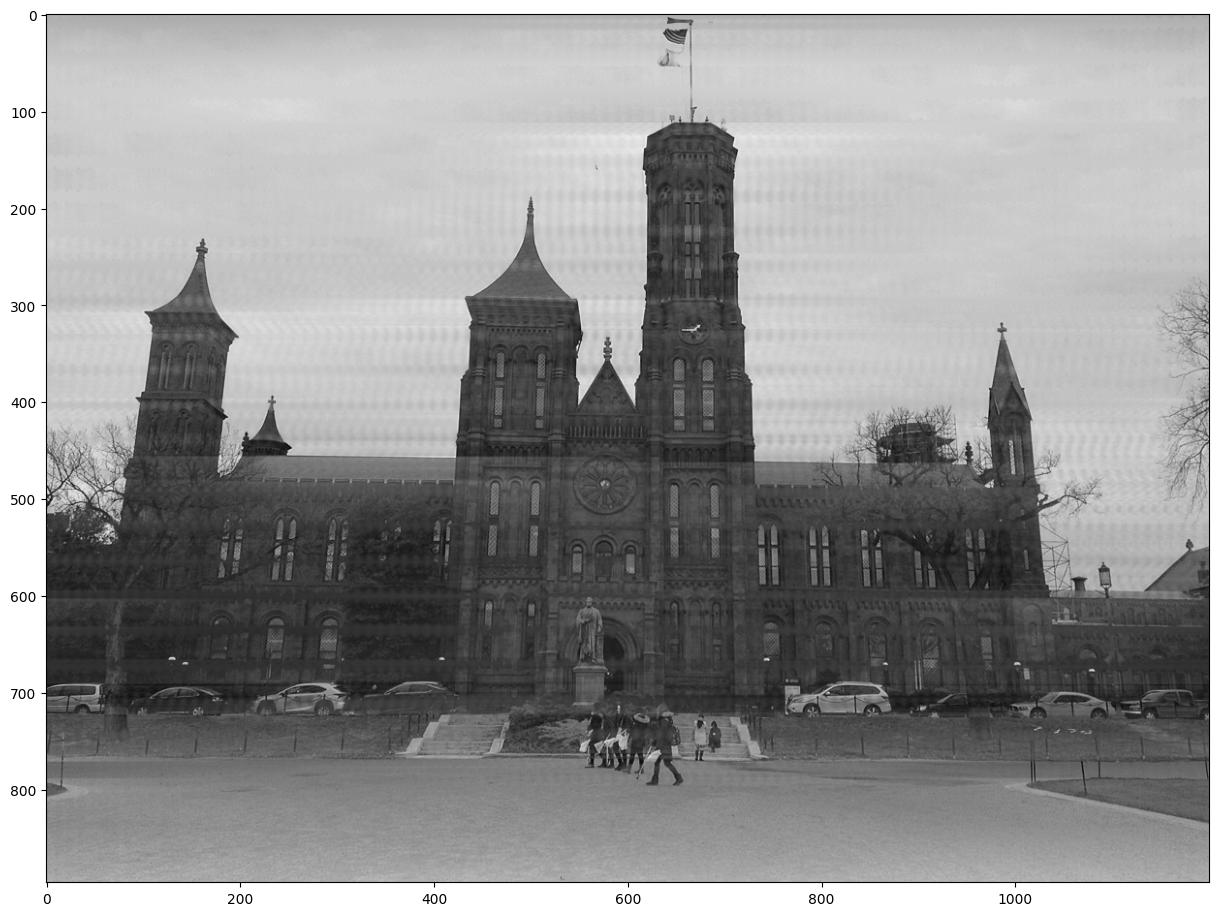

In [ ]:
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

img = np.array(Image.open("image.jpg")).astype(float)

print(img)

plt.imshow(img,cmap='gray')


transformada_fourier_b = np.fft.fft2(img)
centrar = np.fft.fftshift(transformada_fourier_b)

centrar[0:445,598:602]=0
centrar[455:1200,598:602]=0
centrar[0:1200,698:702]=0
centrar[0:1200,498:502]=0

plt.figure(figsize=(15,15))

np.size(centrar[0])
plt.imshow(abs(centrar),norm='log')



transformada_inversa= np.fft.ifft2(np.fft.ifftshift(centrar))

plt.figure(figsize=(15,15))
plt.imshow(np.real(transformada_inversa), cmap = 'gray')

